# Car Price Prediction Project
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase- 

###### Data Collection Phase –
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.

More the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.)

You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback. Note – The data which you are collecting is important to us. Kindly don’t share it on any public
platforms.

###### Model Building Phase-
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

# Using GridSearchCV technique for tunning parameters
from sklearn.model_selection import RandomizedSearchCV

# Loading dataset

We scraped  Used Car data based on the RTO locations, Transmission, Model type and then saved into different excel files. 

Now we will upload all the excel files and combine them together into a single dataframe.

In [2]:
dataframe1=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe1.xlsx",sheet_name="main_sheet")
dataframe1.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2021 Hyundai NEW SANTRO 1.1 MAGNA AMT AUTOMATIC,Non-Accidental,1st,3394,Petrol,AUTOMATIC,DL-8C-x-xxxx,Zero Depreciation,"₹4,84,750"
1,2020 Maruti Baleno DELTA 1.2 K12 MANUAL,Non-Accidental,1st,3920,Petrol,MANUAL,HR-03-x-xxxx,Third_party,"₹6,59,399"
2,2017 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,1st,3927,Petrol,AUTOMATIC,DL-3C-x-xxxx,Comp,"₹6,67,188"
3,2020 Maruti Alto LXI MANUAL,Non-Accidental,1st,3942,Petrol,MANUAL,CH-01-x-xxxx,Comp,"₹3,98,399"
4,2018 Hyundai Elite i20 Magna Executive 1.2 MANUAL,Non-Accidental,1st,3984,Petrol,MANUAL,DL-5C-x-xxxx,Zero_Dep,"₹6,25,000"


In [3]:
dataframe2=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe2.xlsx",sheet_name="main_sheet")
dataframe2.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2013 Maruti Wagon R 1.0 LXI MANUAL,Non-Accidental,1st,13688.0,Petrol,MANUAL,MH-02-x-xxxx,Third_party,"₹3,30,499"
1,2014 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,Non-Accidental,1st,13068.0,Petrol,MANUAL,MH-02-x-xxxx,Comp,"₹3,71,499"
2,2015 Maruti Wagon R 1.0 VXI MANUAL,Non-Accidental,1st,9654.0,Petrol,MANUAL,MH-03-x-xxxx,3rd Party,"₹3,63,999"
3,2015 Maruti Alto 800 LXI MANUAL,Non-Accidental,2nd,7478.0,Petrol,MANUAL,MH-12-x-xxxx,3rd Party,"₹2,66,299"
4,2011 Maruti Alto LXI MANUAL,Non-Accidental,1st,9742.0,Petrol,MANUAL,MH-12-x-xxxx,Third_party,"₹2,00,699"


In [4]:
dataframe3=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe3.xlsx",sheet_name="main_sheet")
dataframe3.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2020 Hyundai NEW SANTRO 1.1 SPORTS AMT MANUAL,Non-Accidental,1st,6248,Petrol,MANUAL,KA-41-x-xxxx,Zero_Dep,"₹6,44,399"
1,2013 Hyundai i10 SPORTZ 1.2 KAPPA2 MANUAL,Non-Accidental,1st,14350,Petrol,MANUAL,KA-05-x-xxxx,Comp,"₹4,10,599"
2,2015 Maruti Alto K10 VXI AMT,Non-Accidental,2nd,12593,Petrol,NaN,KA-53-x-xxxx,Comp,"₹3,79,199"
3,2014 Tata Nano XT TWIST MANUAL,Non-Accidental,1st,25514,Petrol,MANUAL,KA-03-x-xxxx,Comp,"₹1,81,899"
4,2012 Maruti Alto LXI MANUAL,Non-Accidental,2nd,16071,Petrol,MANUAL,KA-05-x-xxxx,3rd Party,"₹2,88,199"


In [5]:
dataframe4=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe4.xlsx",sheet_name="main_sheet")
dataframe4.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2020 Maruti IGNIS SIGMA 1.2 K12 MANUAL,Non-Accidental,1st,5642,Petrol,MANUAL,GJ-01-x-xxxx,Zero_Dep,"₹5,29,899"
1,2020 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,Non-Accidental,1st,4499,Petrol,MANUAL,GJ-01-x-xxxx,3rd Party,"₹4,83,099"
2,2020 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,Non-Accidental,1st,3822,Petrol,MANUAL,GJ-01-x-xxxx,3rd Party,"₹4,61,999"
3,2019 Maruti Eeco 5 STR WITH AC PLUSHTR MANUAL,Non-Accidental,1st,3540,Petrol,MANUAL,GJ-18-x-xxxx,Third_party,"₹4,75,099"
4,2020 Maruti Alto LXI MANUAL,Non-Accidental,1st,3822,Petrol,MANUAL,GJ-01-x-xxxx,Zero_Dep,"₹3,73,799"


In [6]:
dataframe5=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe5.xlsx",sheet_name="main_sheet")
dataframe5.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2013 Hyundai i20 MAGNA O 1.2 MANUAL,Non-Accidental,1st,13601,Petrol,MANUAL,MH-43-x-xxxx,Comp,"₹4,07,199"
1,2015 Hyundai Grand i10 ASTA 1.2 AT VTVT AUTOMATIC,Non-Accidental,1st,10438,Petrol,AUTOMATIC,MH-01-x-xxxx,Comp,"₹5,03,899"
2,2011 Toyota Etios Liva G MANUAL,Non-Accidental,1st,18893,Petrol,MANUAL,MH-01-x-xxxx,NaN,"₹2,75,299"
3,2015 Maruti Alto K10 VXI AMT MANUAL,Non-Accidental,1st,90013,Petrol,MANUAL,MH-12-x-xxxx,Third_party,"₹3,52,999"
4,2011 Chevrolet Spark LT 1.0 MANUAL,Non-Accidental,1st,36258,Petrol,MANUAL,MH-12-x-xxxx,Third_party,"₹1,51,799"


In [7]:
dataframe6=pd.read_excel("D:\Flip robo inter\data\Car-Price-Prediction--2-\data\dataset1\car24_dataframe6.xlsx",sheet_name="main_sheet")
dataframe6.head(5)

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2018 Hyundai Grand i10 MAGNA 1.2 KAPPA VTVT MA...,Non-Accidental,1st,3855,Petrol,MANUAL,UP-32-x-xxxx,Third_party,"₹4,92,499"
1,2020 Maruti New Wagon-R VXI 1.0 MANUAL,Non-Accidental,1st,8078,Petrol,MANUAL,UP-32-x-xxxx,Third_party,"₹5,60,299"
2,2020 Maruti S PRESSO VXI,Non-Accidental,1st,6831,Petrol,NaN,UP-32-x-xxxx,Zero_Dep,"₹4,47,099"
3,2018 Maruti Alto K10 VXI MANUAL,Non-Accidental,1st,3910,Petrol,MANUAL,UP-32-x-xxxx,Zero_Dep,"₹3,64,399"
4,2017 Maruti Swift VXI MANUAL,Non-Accidental,2nd,11688,Petrol,MANUAL,UP-32-x-xxxx,Comp,"₹5,24,099"


In [8]:
# Now combining all the dataframes 
dataset=pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6],ignore_index=True)
dataset

,Model,History,Owner,Kms_driven,Fuel_type,Transmission,Registration,Insurance,Price
0,2021 Hyundai NEW SANTRO 1.1 MAGNA AMT AUTOMATIC,Non-Accidental,1st,3394.0,Petrol,AUTOMATIC,DL-8C-x-xxxx,Zero Depreciation,"₹4,84,750"
1,2020 Maruti Baleno DELTA 1.2 K12 MANUAL,Non-Accidental,1st,3920.0,Petrol,MANUAL,HR-03-x-xxxx,Third_party,"₹6,59,399"
2,2017 Honda Jazz 1.2 V AT AUTOMATIC,Non-Accidental,1st,3927.0,Petrol,AUTOMATIC,DL-3C-x-xxxx,Comp,"₹6,67,188"
3,2020 Maruti Alto LXI MANUAL,Non-Accidental,1st,3942.0,Petrol,MANUAL,CH-01-x-xxxx,Comp,"₹3,98,399"
4,2018 Hyundai Elite i20 Magna Executive 1.2 MANUAL,Non-Accidental,1st,3984.0,Petrol,MANUAL,DL-5C-x-xxxx,Zero_Dep,"₹6,25,000"
...,...,...,...,...,...,...,...,...,...
5204,2015 Hyundai Elite i20 SPORTZ (O) 1.4 MANUAL,Non-Accidental,1st,70513.0,Diesel,MANUAL,UP-32-x-xxxx,Comp,"₹4,33,800"
5205,2017 Tata NEXON XZ+ 1.5 MANUAL,Non-Accidental,1st,87795.0,Diesel,MANUAL,UP-32-x-xxxx,Zero_Dep,"₹6,29,599"
5206,2019 Hyundai Verna 1.4 CRDi EX MT,Non-Accidental,1st,57594.0,Diesel,NaN,UP-32-x-xxxx,NaN,"₹7,82,599"
5207,2018 Maruti Swift VDI AMT AUTOMATIC,Non-Accidental,1st,66116.0,Diesel,AUTOMATIC,UP-32-x-xxxx,Comp,"₹6,26,899"


In [9]:
# After combining data let's check duplicated data 
dataset.duplicated().sum()

419

In [10]:
# So we have some duplicated data let's remove it 
dataset.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
# Now see the dimension of dataset
print("Our dataset contains {} rows and {} columns.".format(dataset.shape[0],dataset.shape[1]))

Our dataset contains 4790 rows and 9 columns.


In [12]:
# Let's store data into excel file
dataset.to_excel("new_datset1.xlsx")

In [13]:
# checking datatypes and other information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         4790 non-null   object 
 1   History       4789 non-null   object 
 2   Owner         4789 non-null   object 
 3   Kms_driven    4789 non-null   float64
 4   Fuel_type     4789 non-null   object 
 5   Transmission  4549 non-null   object 
 6   Registration  4789 non-null   object 
 7   Insurance     3626 non-null   object 
 8   Price         4790 non-null   object 
dtypes: float64(1), object(8)
memory usage: 336.9+ KB


* There is 2 type of data present -
 1.) Float  2.) Object in nature
 
* Insurance and Transmission features contains null values & 1 row is present in dataset with null values in all features.

History -> having null values = 1
Owner -> having null values = 1
Kms_driven -> having null values = 1
Fuel_type -> having null values = 1
Transmission -> having null values = 241
Registration -> having null values = 1
Insurance -> having null values = 1164


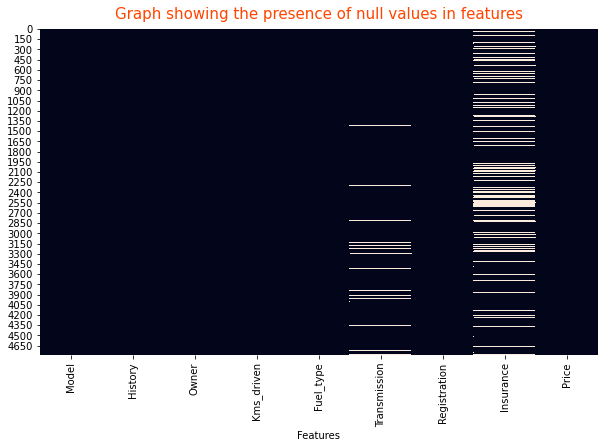

In [14]:
# Checking null values using heatmap
for i in dataset:
    if dataset[i].isnull().sum()>0:
        print("{} -> having null values = {}".format(i,dataset[i].isnull().sum()))

# Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),cbar=False)
plt.title("Graph showing the presence of null values in features",color='orangered',pad=10,fontsize=15,loc='center')
plt.xlabel("Features")
plt.show()

In [15]:
# Percentage of null values present in Insurance and Transmission feature
for i in dataset[['Transmission','Insurance']]:
    print("Percentage of null values in {} feature = {}%".format(i,round(dataset[i].isnull().sum()/dataset.shape[0]*100,2)),)

Percentage of null values in Transmission feature = 5.03%
Percentage of null values in Insurance feature = 24.3%


# Data Cleaning

In [16]:
# 1 missing value in each feature. LEt's drop this first
dataset.dropna(subset=['History'],inplace=True,how='any',axis=0)

In [17]:
dataset.shape

(4789, 9)

In [18]:
# A lot of information in model feature. Let's find out 
dataset['Model'][:4]

0    2021 Hyundai NEW SANTRO 1.1 MAGNA AMT AUTOMATIC
1            2020 Maruti Baleno DELTA 1.2 K12 MANUAL
2                 2017 Honda Jazz 1.2 V AT AUTOMATIC
3                        2020 Maruti Alto LXI MANUAL
Name: Model, dtype: object

* From Model feature we can find out the `Make Year of vehicle, Brand Name, Model, Variant and Transmission` also which is already present in dataset.

In [19]:
# Now using split function finding out the follownings

dataset['Make_yr']=dataset['Model'].str.split().str[0]      # make year of vehicle
dataset['Brand_name']=dataset['Model'].str.split().str[1]   # brand to which vehicle belongs
dataset['model']=dataset['Model'].str.split().str[2]        # model of vehicle
dataset['Variant']=dataset['Model'].str.split().str[3]      # Variant of vehicle

In [20]:
# Let's convert make_yr into interger 
dataset['Make_yr']=dataset['Make_yr'].astype(int)

# We can find one more feature showing the age of vehicle
dataset['Years_old']=2021-dataset['Make_yr']

In [21]:
# function for plotting bargraph for better visualization of data

def barplot(feature,Color):
    plt.figure(figsize=(8.4,3.9),frameon=False,facecolor='lightgreen',edgecolor='black')
    dataset[feature].value_counts().plot.bar(color=Color,edgecolor='r')
    plt.title("{} BarPlot".format(feature),{'fontsize': 15,
        'fontweight' : 500,
        'color' : "crimson",
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
    plt.xlabel(feature,labelpad=15)
    plt.ylabel("Counts",labelpad=15)
    plt.show()

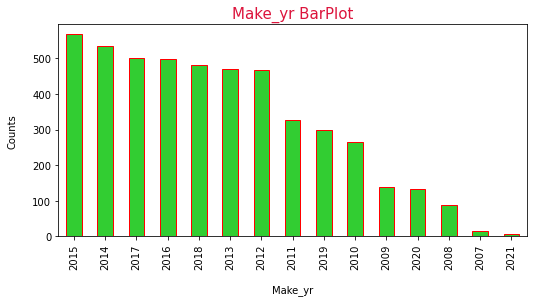

In [22]:
# Make_yr of vehicle
barplot("Make_yr","limegreen")

Cars manufactured in between 2012-2018 are more in number for sale. While a few cars are for resale before 2010. 

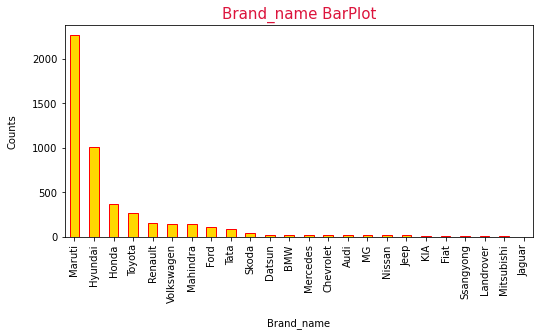

In [23]:
# Based on Brand name of car
barplot("Brand_name","gold")

Maruti and Hundai are the most prefered brands for resale in indian market. These brands are sharing more than 50% of resale market share.

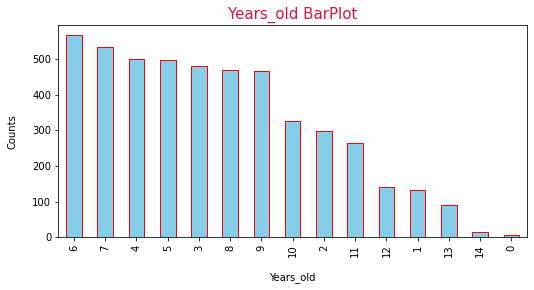

In [24]:
barplot("Years_old","skyblue")

More likely the cars which are 3-9 years old are for resale. 

In [25]:
# See unique values from History feature
dataset['History'].unique()

array(['Non-Accidental'], dtype=object)

History feature represents there is only "Non-Accidental" values. This feature not providing any valuable information, we can drop it.

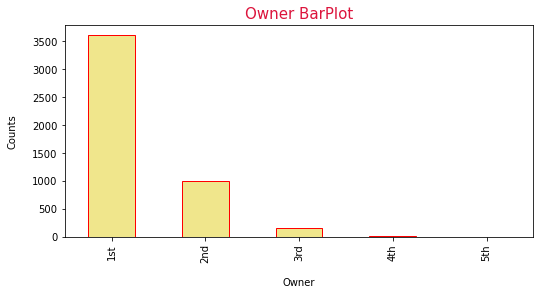

In [26]:
# Based on the number of owners visualize the count of cars for resale
barplot("Owner","khaki")

In car resale market most of the cars for sale are first owners.

Maximum kms driven =  312882.0
Minimum kms driven =  2259.0
Median of kms driven =  53659.0
Mean of kms driven =  60535.41156817707 



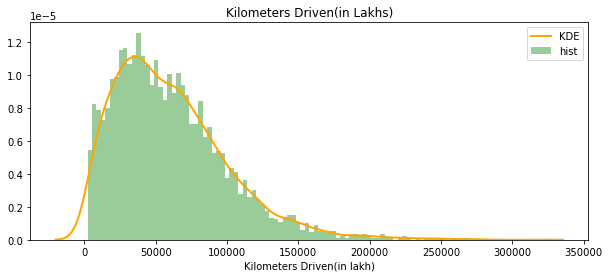

In [27]:
# Kms_driven feature
print("Maximum kms driven = ",max(dataset['Kms_driven']))
print("Minimum kms driven = ",min(dataset['Kms_driven']))
print("Median of kms driven = ",dataset['Kms_driven'].median())
print("Mean of kms driven = ",dataset['Kms_driven'].mean(),"\n")

plt.figure(figsize=(10,4))
sns.distplot(dataset['Kms_driven'],hist=True,kde=True,bins=100,
             kde_kws={"color":'orange',"lw":2,"label":"KDE"},
             hist_kws={"color":'g',"linewidth":2.5,"histtype": "bar","label":"hist"},  
             axlabel="Kilometers Driven(in lakh)",color='red')
plt.title("Kilometers Driven(in Lakhs)")
plt.show()

Minimum kilometers covered by a car is 2`259km`s while maximum kilometers covered is `312882km`. There is huge difference in minimum and maximum kilometers.
The distribution plot of Kilometers driven tells that the data gathered is not uniform. Some cars have travelled less while some very high. The difference between the mean and median shows the `presence of outliers` and the `rightskewness` is present in data as `mean is greater than median`.

Fuel types = ['Petrol' 'Diesel']


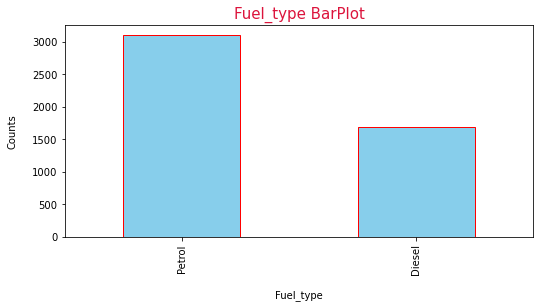

In [28]:
# Fuel type feature
print("Fuel types =",dataset['Fuel_type'].unique())

barplot("Fuel_type","skyblue")

Types of Transmission =  ['AUTOMATIC' 'MANUAL' nan]


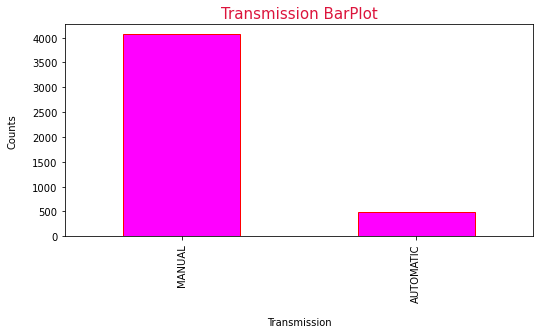

In [29]:
# Transmission feature
print("Types of Transmission = ",dataset['Transmission'].unique())

barplot("Transmission","magenta")

Manual transmission is most prefered.

In [30]:
# There are only 2 types of transmissions either automatic or manual. 
# So filling null values with most repeated type of transmission
dataset['Transmission'].fillna("MANUAL",inplace=True)

In [31]:
# Checking unique values in registration feature
dataset['Registration'].unique()

array(['DL-8C-x-xxxx', 'HR-03-x-xxxx', 'DL-3C-x-xxxx', 'CH-01-x-xxxx',
       'DL-5C-x-xxxx', 'DL-12-x-xxxx', 'HR-51-x-xxxx', 'DL-9C-x-xxxx',
       'DL-6C-x-xxxx', 'DL-14-x-xxxx', 'HR-08-x-xxxx', 'HR-26-x-xxxx',
       'UP-16-x-xxxx', 'DL-1C-x-xxxx', 'DL-2C-x-xxxx', 'DL-10-x-xxxx',
       'PB-91-x-xxxx', 'PB-10-x-xxxx', 'DL-7C-x-xxxx', 'PB-11-x-xxxx',
       'PB-27-x-xxxx', 'UP-32-x-xxxx', 'UP-15-x-xxxx', 'PB-34-x-xxxx',
       'HR-49-x-xxxx', 'UP-14-x-xxxx', 'UP-13-x-xxxx', 'HR-29-x-xxxx',
       'HR-87-x-xxxx', 'UP-53-x-xxxx', 'HR-20-x-xxxx', 'UP-80-x-xxxx',
       'AS-06-x-xxxx', 'HR-13-x-xxxx', 'UP-83-x-xxxx', 'PB-65-x-xxxx',
       'HR-01-x-xxxx', 'HR-30-x-xxxx', 'DL-11-x-xxxx', 'PB-13-x-xxxx',
       'DL-4C-x-xxxx', 'UP-79-x-xxxx', 'UP-25-x-xxxx', 'UP-17-x-xxxx',
       'UP-61-x-xxxx', 'PB-70-x-xxxx', 'GJ-05-x-xxxx', 'WB-02-x-xxxx',
       'PB-29-x-xxxx', 'UP-81-x-xxxx', 'HR-72-x-xxxx', 'UP-86-x-xxxx',
       'PB-02-x-xxxx', 'HR-12-x-xxxx', 'HR-07-x-xxxx', 'HR-32-x-xxxx',
      

In [32]:
# based on the RTO we will extract the first 2 aplhabets  as these have some effect on the price
dataset['RTO']=dataset['Registration'].str.split("-").str[0]

dataset['RTO'].unique()

array(['DL', 'HR', 'CH', 'UP', 'PB', 'AS', 'GJ', 'WB', 'AP', 'MH', 'UK',
       'HP', 'KL', 'MA', 'MJ', 'KA'], dtype=object)

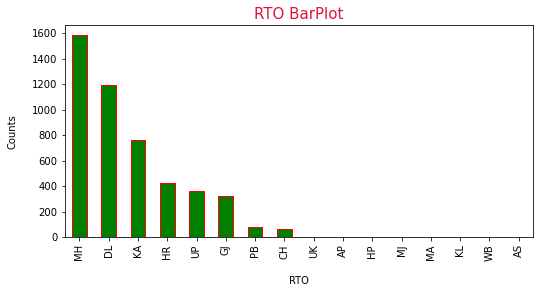

In [33]:
barplot("RTO","green")

In [34]:
# Check unique values in insurance_type feature
dataset['Insurance'].unique()

array(['Zero Depreciation', 'Third_party', 'Comp', 'Zero_Dep', nan,
       'Third Party', '3rd Party', 'Comprehensive'], dtype=object)

In [35]:
# Create dictionary to replace all values with these 3 values
val_to_replace={"Zero Depreciation":"Zero Depreciation","Zero_Dep":"Zero Depreciation" ,
               "Comprehensive":"Comprehensive","Comp":"Comprehensive",
               "Third Party":"Third Party","Third_party":"Third Party","3rd Party":"Third Party"}

# Mapping values to be replaced in list
dataset['Insurance']=dataset['Insurance'].map(val_to_replace)

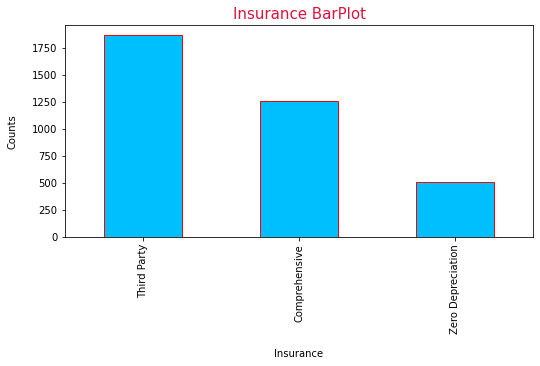

In [36]:
barplot("Insurance","deepskyblue")

In [37]:
# Let's see null values in Insurance feature
dataset['Insurance'].isnull().sum()

1163

In [38]:
# Fill null values using the most repeated character
dataset['Insurance'].fillna("Third Party",inplace=True)

In [39]:
# As we have Re-sale price mentioned in our dataset and it is object in nature.
# Convert it into number(int,float)
price=[]
for i in dataset['Price']:
    price.append(i.replace("₹","").replace(",",""))
    
dataset['SalePrice']=price
dataset['SalePrice']=dataset['SalePrice'].astype(float)

In [40]:
# Re-checking null values
dataset.isnull().sum()

Model           0
History         0
Owner           0
Kms_driven      0
Fuel_type       0
Transmission    0
Registration    0
Insurance       0
Price           0
Make_yr         0
Brand_name      0
model           0
Variant         0
Years_old       0
RTO             0
SalePrice       0
dtype: int64

## EDA

In [41]:
# Function for bivariate analysis using barplot to find the average sale price based on diff features
def bivariate_analysis(ind_feature,Color):
    
    # Grouping SalePrice and one other feature
    group_values=dataset.groupby(ind_feature)['SalePrice'].mean()
    plt.figure(figsize=(9,3.9))
    # Sorting values in descending order & then plotting graph
    group_values.sort_values(ascending=False).plot.bar(color=Color,edgecolor='black')
    plt.title("Average SalePrice based on {}".format(ind_feature),fontsize=16,color='black',pad=12)
    plt.xlabel(ind_feature,labelpad=15)
    plt.ylabel("SalePrice (in ₹Lakhs)",labelpad=15)
    plt.show()

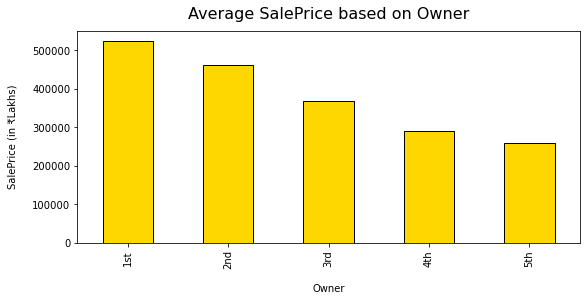

In [42]:
bivariate_analysis("Owner","gold")

Resale of car in used car market depends on the number of owners present for the car as from the above graph it clearly shows the average saleprice of 1st and 5th owners have a lot of difference.

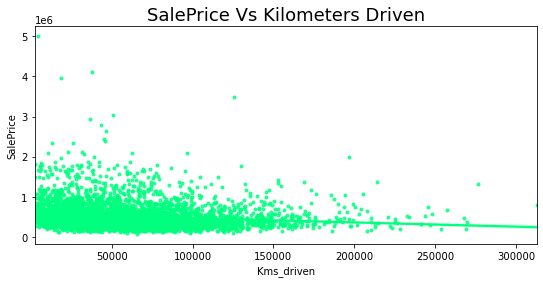

In [43]:
# SalePrice based on Kilometers driven
plt.figure(figsize=(9,4))
sns.regplot(x="Kms_driven",y='SalePrice',data=dataset,color='springgreen',marker='.')
plt.title("SalePrice Vs Kilometers Driven",color='black',fontsize=18)
plt.show()

Based on the scatter plot  we find that there is slightly negative realtion of SalePrice upon Kilometers driven. 

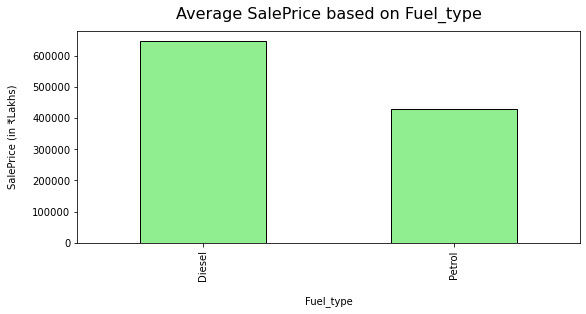

In [44]:
bivariate_analysis("Fuel_type","lightgreen")

Another feature which impact the SalePrice is Fuel type. Cars in which Diesel is used are having high average saleprice then Petrol as Deisel cars are more costliers than Petrol cars.

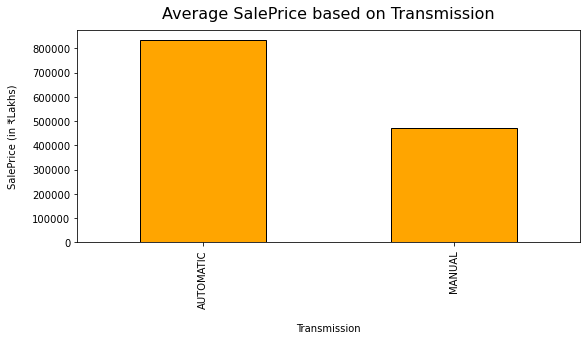

In [45]:
bivariate_analysis("Transmission",'orange')

Baesd on the transmission ,we find out that cars with automatic transmission are having high SalePrice compared to Manual transmission. Again Automatic transmission are costliers than Manual type of transmuission.

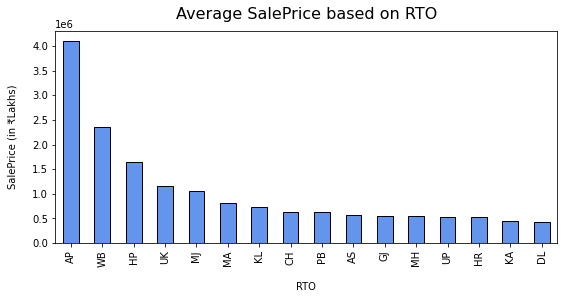

In [46]:
bivariate_analysis("RTO","cornflowerblue")

Based on the RTO locations above graph showing that `AndraPradesh, West Bengal, HimachalPradesh` are among the most valued for high SalePrice while Delhi is in least valued RTO locations.

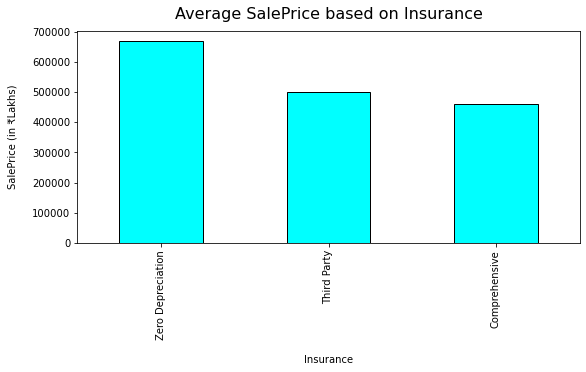

In [47]:
bivariate_analysis("Insurance","aqua")

In Comprehensive ,any damage to vehicle, owner or third person all liabilities are recoverd through insurance company. There is no need to bear all the charges own but in third-party insurance as clear with the name only covers for third party liabilities while in Zero Depreciation we have some premium add on.

So basically according to the need of vehicle owners Zero Depreciation is more valuable then others and having High salePrice tehn other types of insurance.

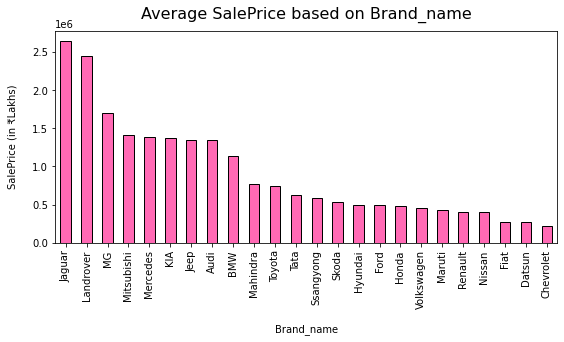

In [48]:
bivariate_analysis("Brand_name","hotpink")

                    Based on the Brands we find out Average SalePrice of some premium brand are very high than other brands present in Indian market like `Jaguar, Landrover` and `Fiat, Datsun, Chevrlet` are the brands with least SalePrice.

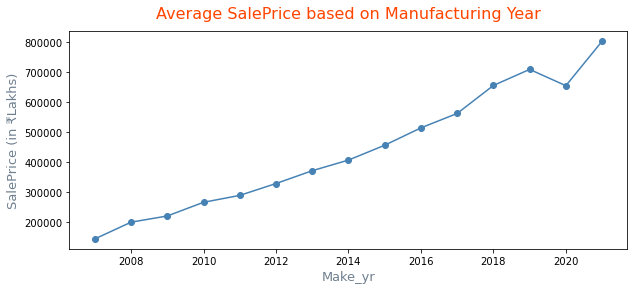

In [49]:
# SalePrice analysis based on years
plt.figure(figsize=(10,4))
plt.plot(dataset.groupby("Make_yr")["SalePrice"].median(),marker="o",color='steelblue')
plt.title("Average SalePrice based on Manufacturing Year",color='orangered',fontsize=16,pad=13,loc='center')
plt.xlabel("Make_yr",fontsize=13,color='slategray')
plt.ylabel("SalePrice (in ₹Lakhs)",color="slategray",fontsize=13)
plt.show()

    In covid crisis, whole economy suffered a lot & due to this demand supply for some goods decreases. This decrease in demands sets the saleprice at low indexes that's why  we are creating a model for our client and this behaviour in SalePrice can be seen in above graph as the constant increase in SalePrice each year suddenly falls in 2020 but in 2021 is again stars to rise.

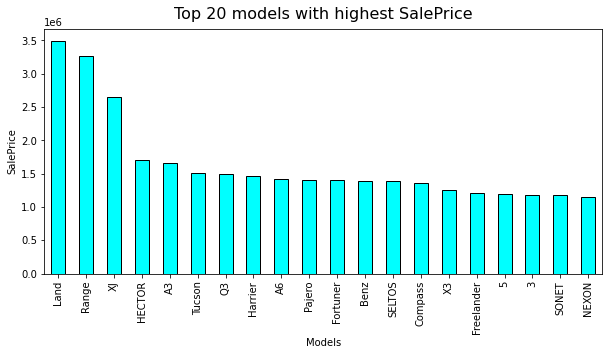

In [50]:
# Top 20 model with highest SalePrice
plt.figure(figsize=(10,4.5))
dataset.groupby("model")['SalePrice'].mean().sort_values(ascending=False)[:20].plot.bar(color='cyan',edgecolor='black')
plt.title("Top 20 models with highest SalePrice",fontsize=16,pad=10,color='black')
plt.xlabel("Models")
plt.ylabel("SalePrice")
plt.show()

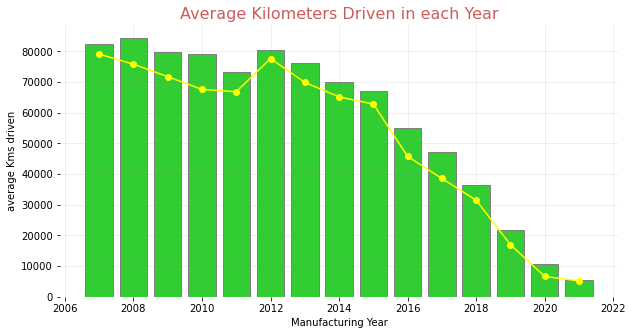

In [51]:
# Barplot on average kilometer driven in each Make year of car
fig, ax = plt.subplots(figsize =(10,5))
a=dataset.groupby("Make_yr")['Kms_driven'].mean()
ax.bar(a.index,a.values,color='limegreen',edgecolor='grey')
ax.plot(dataset.groupby("Make_yr")["Kms_driven"].median(),marker="o",color='yellow')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-', linewidth=0.6,
        alpha=0.2)
# Setting  title and lables
ax.set_title("Average Kilometers Driven in each Year",fontsize=16,loc='center',color='indianred')
ax.set_xlabel("Manufacturing Year")
ax.set_ylabel("average Kms driven")
plt.show()

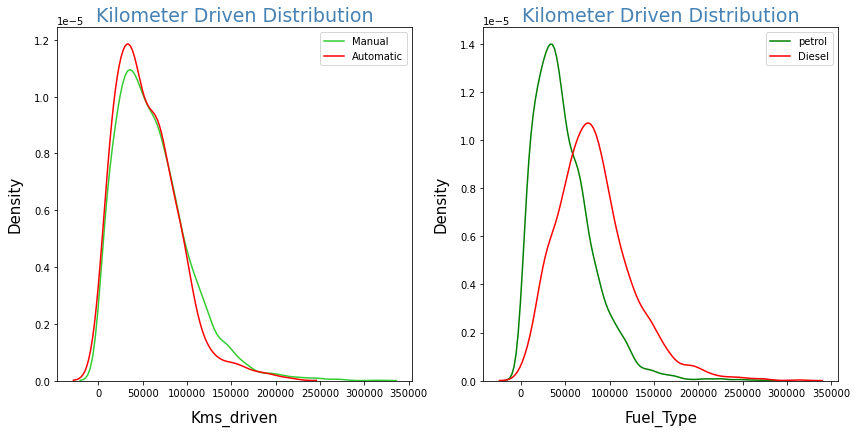

In [52]:
# distribution plots of transmission and fuel_type based on Kilometere driven
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6.5))
# plot for transmission and kilometers  driven
sns.distplot(dataset[dataset['Transmission']=="MANUAL"]['Kms_driven'],ax=ax[0],
             color='limegreen',hist=False,label='Manual')
sns.distplot(dataset[dataset['Transmission']=='AUTOMATIC']['Kms_driven'],ax=ax[0],
             color='red',hist=False,label='Automatic',
            )
# plot for fuel_type and kilometers  driven
sns.distplot(dataset[dataset['Fuel_type']=="Petrol"]['Kms_driven'],ax=ax[1],
            label="petrol",hist=False,color='green')
sns.distplot(dataset[dataset['Fuel_type']=='Diesel']['Kms_driven'],ax=ax[1],
            label="Diesel",hist=False,color='red')
# setting title
ax[0].set_title("Kilometer Driven Distribution",fontsize=19,color='steelblue')
ax[1].set_title("Kilometer Driven Distribution",fontsize=19,color='steelblue')

# setting x and y axis label 
ax[0].set_xlabel("Kms_driven",fontsize=15,labelpad=12)
ax[0].set_ylabel("Density",fontsize=15,labelpad=12)
ax[1].set_xlabel("Fuel_Type",fontsize=15,labelpad=12)
ax[1].set_ylabel("Density",fontsize=15,labelpad=12)

plt.show()

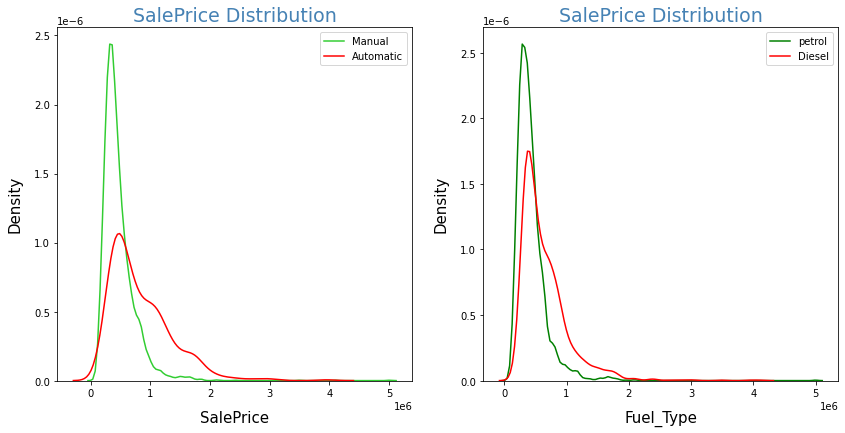

In [53]:
# Distribution plot of transmission and fuel_type based on SalePrice
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6.5))
sns.distplot(dataset[dataset['Transmission']=="MANUAL"]['SalePrice'],ax=ax[0],
             color='limegreen',hist=False,label='Manual')
sns.distplot(dataset[dataset['Transmission']=='AUTOMATIC']['SalePrice'],ax=ax[0],
             color='red',hist=False,label='Automatic',
            )

sns.distplot(dataset[dataset['Fuel_type']=="Petrol"]['SalePrice'],ax=ax[1],
            label="petrol",hist=False,color='green')
sns.distplot(dataset[dataset['Fuel_type']=='Diesel']['SalePrice'],ax=ax[1],
            label="Diesel",hist=False,color='red')

ax[0].set_title("SalePrice Distribution",fontsize=19,color='steelblue')
ax[1].set_title("SalePrice Distribution",fontsize=19,color='steelblue')

ax[0].set_xlabel("SalePrice",fontsize=15,labelpad=12)
ax[0].set_ylabel("Density",fontsize=15,labelpad=12)

ax[1].set_xlabel("Fuel_Type",fontsize=15,labelpad=12)
ax[1].set_ylabel("Density",fontsize=15,labelpad=12)

plt.show()

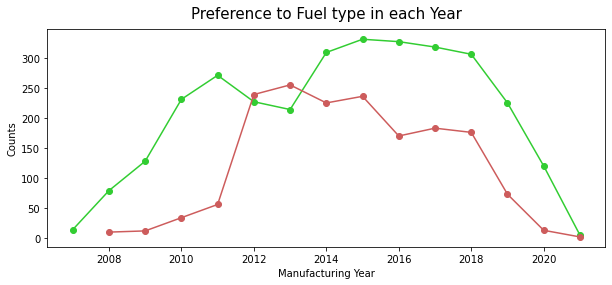

In [54]:
# Line plots to fuel type preference in each year
plt.figure(figsize=(10,4))
dataset[dataset['Fuel_type']=='Petrol']['Make_yr'].value_counts().sort_index(ascending=True).plot(marker="o",color='limegreen')
dataset[dataset['Fuel_type']=='Diesel']['Make_yr'].value_counts().sort_index(ascending=True).plot(marker='o',color='indianred')
plt.title("Preference to Fuel type in each Year",fontsize=15,pad=11)
plt.xlabel("Manufacturing Year")
plt.ylabel("Counts")
plt.show()

###### Observations from visualizations :
1.	Cars manufactured in between 2012-2018 are more in number for sale. While a few cars are for resale before 2010.
2.	Maruti and Hundai are the most prefered brands for resale in indian market. These brands are sharing more than 50% of resale market share.
3.	More likely the cars which are 3-9 years old are for resale.
4.	History feature represents there is only "Non-Accidental" values. This feature not providing any valuable information, we can drop it.
5.	In car resale market most of the cars for sale are first owners.
6.	Minimum kilometers covered by a car is 2`259km`s while maximum kilometers covered is `312882km`. There is huge difference in minimum and maximum kilometers.
7.	The distribution plot of Kilometers driven tells that the data gathered is not uniform. Some cars have travelled less while some very high. The difference between the mean and median shows the `presence of outliers` and the `rightskewness` is present in data as `mean is greater than median`.
8.	Manual transmission is most prefered.
9.	Resale of car in used car market depends on the number of owners present for the car as from the above graph it clearly shows the average saleprice of 1st and 5th owners have a lot of difference.
10.	Based on the scatter plot  we find that there is slightly negative relation of SalePrice upon Kilometers driven.
11.	Another feature which impact the SalePrice is Fuel type. Cars in which Diesel is used are having high average saleprice then Petrol as Deisel cars are more costly than Petrol cars.
12.	Based on the transmission ,we find out that cars with automatic transmission are having high SalePrice compared to Manual transmission. Again Automatic transmission are costly than Manual type of transmission.
13.	Based on the RTO locations above graph showing that `AndraPradesh, West Bengal, HimachalPradesh` are among the most valued for high SalePrice while Delhi is in least valued RTO locations.
14.	In Comprehensive ,any damage to vehicle, owner or third person all liabilities are recoverd through insurance company. There is no need to bear all the charges own but in third-party insurance as clear with the name only covers for third party liabilities while in Zero Depreciation we have some premium add on.
15.	So basically according to the need of vehicle owners Zero Depreciation is more valuable then others and having High salePrice then other types of insurance.
16.	Based on the Brands we find out Average SalePrice of some premium brand are very high than other brands present in Indian market like `Jaguar, Landrover` and `Fiat, Datsun, Chevrlet` are the brands with least SalePrice.
17.	In covid crisis, whole economy suffered a lot & due to this demand supply for some goods decreases. This decrease in demands sets the saleprice at low indexes that's why  we are creating a model for our client and this behaviour in SalePrice can be seen in above graph as the constant increase in SalePrice each year suddenly falls in 2020 but in 2021 is again stars to rise.


## Data Preprocessing

In [55]:
# Copying the dataset
model_dataset=dataset.copy()

# removing unnecessary columns
model_dataset.drop(columns=['Make_yr','Model',"Price","Registration","History"],inplace=True)

In [56]:
model_dataset.head(5)

,Owner,Kms_driven,Fuel_type,Transmission,Insurance,Brand_name,model,Variant,Years_old,RTO,SalePrice
0,1st,3394.0,Petrol,AUTOMATIC,Zero Depreciation,Hyundai,NEW,SANTRO,0,DL,484750.0
1,1st,3920.0,Petrol,MANUAL,Third Party,Maruti,Baleno,DELTA,1,HR,659399.0
2,1st,3927.0,Petrol,AUTOMATIC,Comprehensive,Honda,Jazz,1.2,4,DL,667188.0
3,1st,3942.0,Petrol,MANUAL,Comprehensive,Maruti,Alto,LXI,1,CH,398399.0
4,1st,3984.0,Petrol,MANUAL,Zero Depreciation,Hyundai,Elite,i20,3,DL,625000.0


In [57]:
# High skewness present in Owner feature. Let's replace its values into lessthan1 and greater than 1.
val_to_replace={"1st":"one", "2nd":"various" ,"3rd":"various" , "4th":"various" , "5th":"various"}
# mapping values
model_dataset["Owner"] =model_dataset["Owner"].map(val_to_replace)

In [58]:
# list the columns which are categorical in nature
cols=[]
for i in model_dataset.columns:
    if model_dataset[i].dtype =='object':
        cols.append(i)

In [59]:
cols

['Owner',
 'Fuel_type',
 'Transmission',
 'Insurance',
 'Brand_name',
 'model',
 'Variant',
 'RTO']

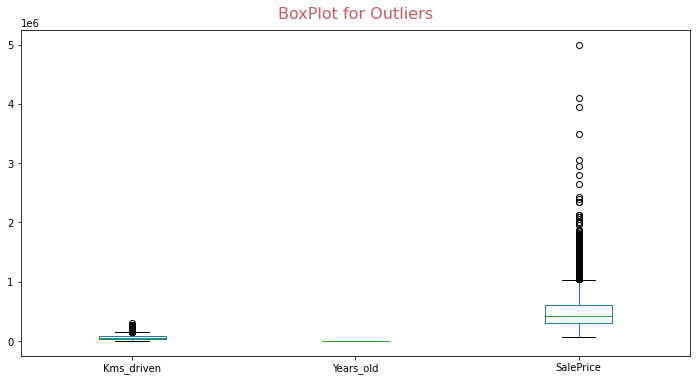

In [60]:
# Checking oultiers
model_dataset.plot.box(figsize=(12,6))
plt.title("BoxPlot for Outliers",color='indianred',fontsize=16,pad=11)
plt.show()

In [61]:
from sklearn.preprocessing import OrdinalEncoder

# Using ordinal encoder to encoder categorical data into numerical
ol=OrdinalEncoder()
for i in cols:
    model_dataset[[i]]=ol.fit_transform(model_dataset[[i]])

In [62]:
# checking outliers using zscore method
from scipy.stats import zscore
z=np.abs(zscore(model_dataset))
z

array([[0.5682677 , 1.42411539, 0.73644487, ..., 2.16054217, 1.22487635,
        0.0674221 ],
       [0.5682677 , 1.41100608, 0.73644487, ..., 1.82642836, 0.35973705,
        0.47848498],
       [0.5682677 , 1.41083162, 0.73644487, ..., 0.82408693, 1.22487635,
        0.50283136],
       ...,
       [0.5682677 , 0.07330777, 1.35787489, ..., 1.49231455, 1.94730109,
        0.86357595],
       [0.5682677 , 0.13908305, 1.35787489, ..., 1.15820074, 1.94730109,
        0.37689848],
       [0.5682677 , 5.16132098, 1.35787489, ..., 1.18059592, 1.94730109,
        0.09383772]])

In [63]:
# Whose zsore value greater then threshold value
np.where(z>3)

(array([  34,   44,   47,   66,   95,   98,  110,  127,  178,  179,  216,
         237,  274,  285,  306,  346,  367,  372,  399,  447,  471,  486,
         592,  654,  687,  721,  759,  801,  895,  921,  952,  954, 1002,
        1039, 1126, 1290, 1583, 1659, 1762, 1959, 1960, 1961, 1962, 1963,
        1964, 1965, 1966, 1967, 1968, 1969, 1970, 1970, 1971, 1972, 1973,
        1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
        1985, 1986, 2059, 2086, 2130, 2202, 2254, 2263, 2286, 2290, 2296,
        2321, 2322, 2395, 2417, 2420, 2434, 2444, 2445, 2481, 2499, 2500,
        2511, 2524, 2557, 2560, 2570, 2586, 2589, 2608, 2610, 2611, 2613,
        2614, 2615, 2616, 2622, 3036, 3091, 3104, 3165, 3291, 3380, 3413,
        3556, 3559, 3611, 3643, 3702, 3721, 3823, 3832, 3934, 3954, 3961,
        4010, 4046, 4084, 4097, 4115, 4125, 4129, 4131, 4181, 4277, 4289,
        4291, 4326, 4335, 4337, 4344, 4348, 4353, 4358, 4359, 4360, 4361,
        4362, 4363, 4364, 4365, 4366, 

In [64]:
# Let's give new name to dataset after outliers removal
cardata_new=model_dataset[(z<3).all(axis=1)]
cardata_new

,Owner,Kms_driven,Fuel_type,Transmission,Insurance,Brand_name,model,Variant,Years_old,RTO,SalePrice
0,0.0,3394.0,1.0,0.0,2.0,7.0,72.0,143.0,0,3.0,484750.0
1,0.0,3920.0,1.0,1.0,1.0,14.0,15.0,56.0,1,6.0,659399.0
2,0.0,3927.0,1.0,0.0,0.0,6.0,61.0,2.0,4,3.0,667188.0
3,0.0,3942.0,1.0,1.0,0.0,14.0,9.0,103.0,1,2.0,398399.0
4,0.0,3984.0,1.0,1.0,2.0,7.0,37.0,213.0,3,3.0,625000.0
...,...,...,...,...,...,...,...,...,...,...,...
4784,0.0,68315.0,0.0,1.0,1.0,5.0,34.0,5.0,5,14.0,594799.0
4785,0.0,70513.0,0.0,1.0,0.0,7.0,37.0,213.0,6,14.0,433800.0
4786,0.0,87795.0,0.0,1.0,2.0,21.0,73.0,202.0,4,14.0,629599.0
4787,0.0,57594.0,0.0,1.0,1.0,7.0,117.0,4.0,2,14.0,782599.0


In [65]:
# Checking percentage loss of data
print("Percentage loss of data in treating outliers {}%".format(round((model_dataset.shape[0]-cardata_new.shape[0])/model_dataset.shape[0]*100,2)))

Percentage loss of data in treating outliers 3.38%


In [66]:
# Checkinig skewness
cardata_new.skew()

Owner           1.189748
Kms_driven      0.715876
Fuel_type      -0.685095
Transmission   -2.831751
Insurance       0.040706
Brand_name      0.146087
model           0.002558
Variant         0.059977
Years_old       0.181510
RTO             0.212382
SalePrice       1.298426
dtype: float64

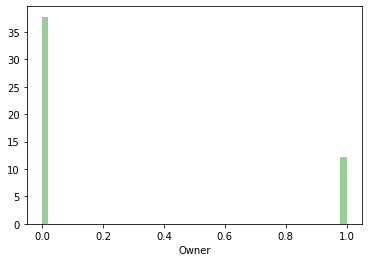

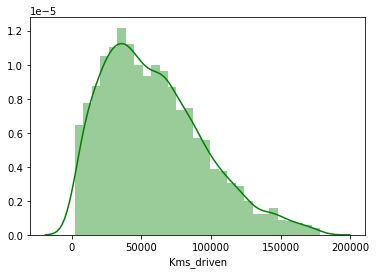

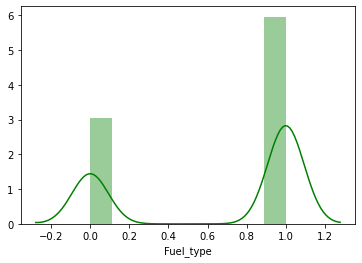

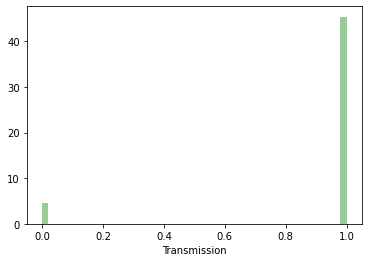

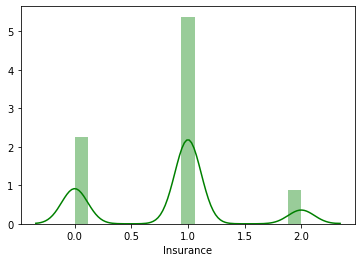

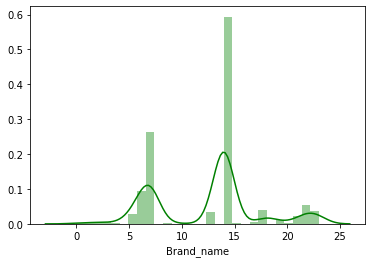

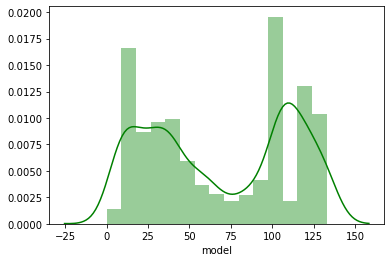

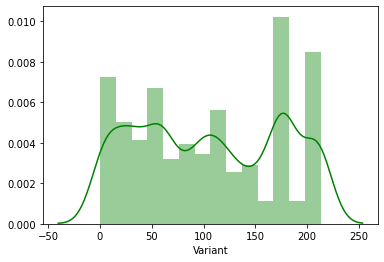

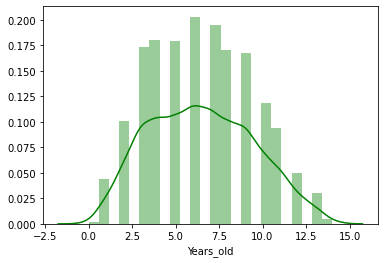

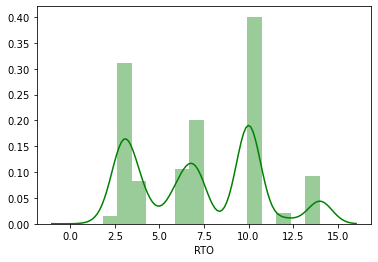

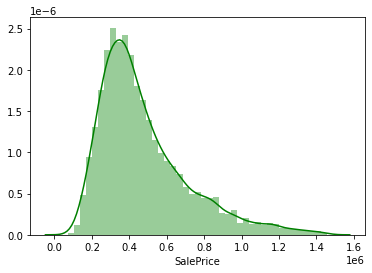

In [67]:
for i in cardata_new.columns:
    plt.subplots()
    sns.distplot(cardata_new[i],hist=True, label="%.2f"%cardata_new[i].skew(), color='green')
    #plt.title(cardata_new[i])

In [68]:
# Removing skewness
from sklearn.preprocessing import PowerTransformer

pw = PowerTransformer()

cardata_new['Transmission']=pw.fit_transform(cardata_new[['Transmission']])
cardata_new['Owner']=pw.fit_transform(cardata_new[['Owner']])
cardata_new['Brand_name']=pw.fit_transform(cardata_new[['Brand_name']])

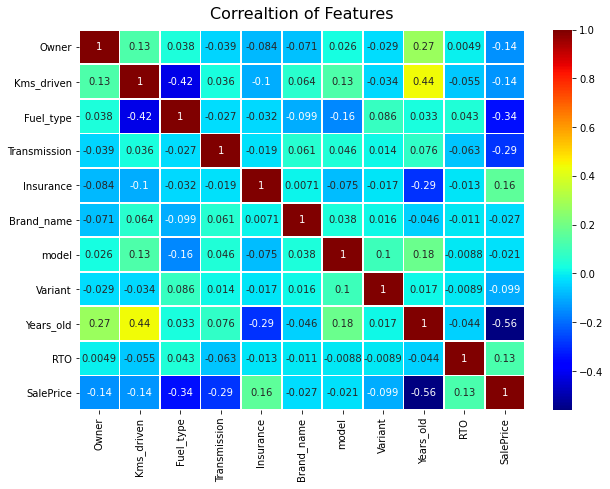

In [69]:
# Plotting correlational plot
plt.figure(figsize=(10,7))
sns.heatmap(cardata_new.corr(), annot=True, fmt='.2g', linewidths=0.8,
    linecolor='white', cmap='jet')
plt.title("Correaltion of Features", fontsize=16, pad=11)
plt.show()

###### Observations:
* SalePrice having 50% negative correalation wiht Years_old feature which indicated that more the old less will be the SalePrice of car and vice-versa.
* Variant is least correlated with SalePrice which indicated less fluctuations in SalePrice based on Variant of car.
* Years_old and Kms_driven are sharing  positive correlation of 40% which is quite realistic as more the years more will be the distance travelled.

In [70]:
cardata_new.head(5)

,Owner,Kms_driven,Fuel_type,Transmission,Insurance,Brand_name,model,Variant,Years_old,RTO,SalePrice
0,-0.568782,3394.0,1.0,-3.148450,2.0,-1.078975,72.0,143.0,0,3.0,484750.0
1,-0.568782,3920.0,1.0,0.317617,1.0,0.367502,15.0,56.0,1,6.0,659399.0
2,-0.568782,3927.0,1.0,-3.148450,0.0,-1.305635,61.0,2.0,4,3.0,667188.0
3,-0.568782,3942.0,1.0,0.317617,0.0,0.367502,9.0,103.0,1,2.0,398399.0
4,-0.568782,3984.0,1.0,0.317617,2.0,-1.078975,37.0,213.0,3,3.0,625000.0


In [71]:
# now rescaling our data so that model will not be biased
from sklearn.preprocessing import MinMaxScaler
mxn_scale=MinMaxScaler()

for i in cardata_new.columns:
     cardata_new[[i]]=mxn_scale.fit_transform(cardata_new[[i]])

In [72]:
cardata_new.head(5)

,Owner,Kms_driven,Fuel_type,Transmission,Insurance,Brand_name,model,Variant,Years_old,RTO,SalePrice
0,0.0,0.006445,1.0,0.0,1.0,0.373834,0.541353,0.671362,0.000000,0.153846,0.298101
1,0.0,0.009432,1.0,1.0,0.5,0.666604,0.112782,0.262911,0.071429,0.384615,0.423953
2,0.0,0.009472,1.0,0.0,0.0,0.327958,0.458647,0.009390,0.285714,0.153846,0.429566
3,0.0,0.009557,1.0,1.0,0.0,0.666604,0.067669,0.483568,0.071429,0.076923,0.235877
4,0.0,0.009795,1.0,1.0,1.0,0.373834,0.278195,1.000000,0.214286,0.153846,0.399165


#### Splitting dataset into Dependent & Independent variables

In [73]:
X=cardata_new.iloc[:,:-1]
y=cardata_new['SalePrice']
print("Splitted dependent & Independent data successfully.")

Splitted dependent & Independent data successfully.


## Model Building

#### Find best random state

In [74]:
# Let's find best random state

max_r_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred = lin_reg.predict(x_test)
    R2_score = r2_score(y_test,y_pred)
    
    if R2_score > max_r_score:
        max_r_score = R2_score
        final_random_state = i
print("Max r2 score corresponding to ",final_random_state,"is ",max_r_score,".")

Max r2 score corresponding to  57 is  0.5405142018133033 .


#### Splitting data for training and testing

In [75]:
# now lets provide the best random state to the model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=final_random_state)


# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [76]:
# defining all the models 
Linear_reg = LinearRegression()
Ridge_reg = Ridge()
Dectr_reg = DecisionTreeRegressor()
sv_reg = SVR()
rf_reg = RandomForestRegressor()
knn_reg = KNeighborsRegressor()
adb_reg = AdaBoostRegressor()
grd_reg = GradientBoostingRegressor()


In [77]:
# Ceate empty list to store result of each algorithm

Model = []       # algorithm used 
coef_of_detr = []     # R2 score of algorithm
MAE = []         # mean absolute error 
MSE = []         # mean squared error 
RMSE = []        # root mean squared error 
CVScore = []     # mean of cross val score 
Std = []         # standard deviation in cross val 


def r2score(model):
    print(30*" ",model,10*" ")
    Model.append(str(model))
    # Training score
    model.fit(x_train,y_train)
    print("\nTraining Score {} %".format(round(model.score(x_train,y_train)*100,3)))
    y_pred = model.predict(x_test)
    # R2 score value
    r2 = r2_score(y_test,y_pred)
    print("\nCoeff. of determination = %.2f"%r2)
    coef_of_detr.append(round(r2,2))
    # Mean absolute error
    mae=mean_absolute_error(y_test,y_pred)
    print("Mean absolute error = ",mae)
    MAE.append(mae)
    # Mean squared error 
    mse=mean_squared_error(y_test,y_pred)
    print("Mean Squared error = ",mse)
    MSE.append(mse)
    # Root mean squared error
    print("Root means sq. error = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    # cross validation
    cvs=cross_val_score(model,X,y,cv=6,scoring='r2')
    print("\nCross val score = ",round(cvs.mean()*100,3),"%")
    CVScore.append(round(cvs.mean()*100,3))
    # Standard deviation
    print("Standard deviation = %.2f"%cvs.std())
    Std.append(cvs.std())
    print("\n",30*"*-*")

In [78]:
r2score(Linear_reg)

                               LinearRegression()           

Training Score 49.512 %

Coeff. of determination = 0.54
Mean absolute error =  0.0875562582756172
Mean Squared error =  0.013420248867024934
Root means sq. error =  0.11584579779614336

Cross val score =  46.353 %
Standard deviation = 0.06

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [79]:
r2score(Ridge_reg)

                               Ridge()           

Training Score 49.51 %

Coeff. of determination = 0.54
Mean absolute error =  0.08751159816759255
Mean Squared error =  0.013420882057429076
Root means sq. error =  0.11584853066581845

Cross val score =  46.367 %
Standard deviation = 0.06

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [80]:
r2score(Dectr_reg)

                               DecisionTreeRegressor()           

Training Score 100.0 %

Coeff. of determination = 0.80
Mean absolute error =  0.048972875910219385
Mean Squared error =  0.0058719021552590496
Root means sq. error =  0.07662833780827462

Cross val score =  71.964 %
Standard deviation = 0.07

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [81]:
r2score(sv_reg)

                               SVR()           

Training Score 70.693 %

Coeff. of determination = 0.68
Mean absolute error =  0.06968065724055567
Mean Squared error =  0.009232009667695619
Root means sq. error =  0.09608334750463068

Cross val score =  61.93 %
Standard deviation = 0.04

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [82]:
r2score(rf_reg)

                               RandomForestRegressor()           

Training Score 98.091 %

Coeff. of determination = 0.90
Mean absolute error =  0.035936224012240434
Mean Squared error =  0.002902446762594971
Root means sq. error =  0.053874360901963105

Cross val score =  84.789 %
Standard deviation = 0.02

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [83]:
r2score(knn_reg)

                               KNeighborsRegressor()           

Training Score 72.595 %

Coeff. of determination = 0.66
Mean absolute error =  0.06626750989552407
Mean Squared error =  0.009918234472115373
Root means sq. error =  0.09959033322624929

Cross val score =  55.13 %
Standard deviation = 0.05

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [84]:
r2score(adb_reg)

                               AdaBoostRegressor()           

Training Score 46.46 %

Coeff. of determination = 0.46
Mean absolute error =  0.10604331721724433
Mean Squared error =  0.01584171684293069
Root means sq. error =  0.1258638822018878

Cross val score =  41.46 %
Standard deviation = 0.18

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [85]:
r2score(grd_reg)

                               GradientBoostingRegressor()           

Training Score 83.962 %

Coeff. of determination = 0.83
Mean absolute error =  0.04969894623489095
Mean Squared error =  0.005064586244566281
Root means sq. error =  0.07116590647610892

Cross val score =  78.705 %
Standard deviation = 0.01

 *-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


### Evaluations of Algorithms

In [86]:
# Table view of result of each metrix from above algorithms
evaluations = pd.DataFrame({"Model":Model,"coef_of_detr":coef_of_detr,"MAE":MAE,"MSE":MSE,
                                 "RMSE":RMSE,"CV Score":CVScore,"Stnd_dev":Std})
evaluations

,Model,coef_of_detr,MAE,MSE,RMSE,CV Score,Stnd_dev
0,LinearRegression(),0.54,0.087556,0.013420,0.115846,46.353,0.057337
1,Ridge(),0.54,0.087512,0.013421,0.115849,46.367,0.057066
2,DecisionTreeRegressor(),0.80,0.048973,0.005872,0.076628,71.964,0.066731
3,SVR(),0.68,0.069681,0.009232,0.096083,61.930,0.040841
4,RandomForestRegressor(),0.90,0.035936,0.002902,0.053874,84.789,0.024504
5,KNeighborsRegressor(),0.66,0.066268,0.009918,0.099590,55.130,0.046838
6,AdaBoostRegressor(),0.46,0.106043,0.015842,0.125864,41.460,0.180585
7,GradientBoostingRegressor(),0.83,0.049699,0.005065,0.071166,78.705,0.014961


## Hyperparameter Tunning

#### Hyper parameter tunning for Random Forest Regressor

In [87]:
# setting parameters dictionary
parameters={'n_estimators' : [100, 200, 300, 1000]
            ,'bootstrap': [True],
            'criterion':['mse','mae'],
           'max_depth': [80, 90, 100,None],
           'max_features': ['auto','sqrt'],
            'min_samples_leaf' : [1, 2, 4],
            'min_samples_split' : [8, 10, 12]
           }

In [88]:
# Using RandomizedSearchCV for hyperparmeter tunning
rf_rdcv = RandomizedSearchCV(rf_reg, param_distributions=parameters,
                      scoring='r2', n_jobs=-1, verbose=2, cv=5)

rf_rdcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   scoring='r2', verbose=2)

In [89]:
# finding best parameters and best score
print(rf_rdcv.best_params_)
print(rf_rdcv.best_score_)

{'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'criterion': 'mse', 'bootstrap': True}
0.8181004836453347


In [90]:
# Let's now try best parameters for RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators= 100, min_samples_split=8, min_samples_leaf= 1,
                            max_features= 'sqrt', max_depth= 90, criterion= 'mse', 
                            bootstrap= True, random_state=final_random_state)
rfr.fit(x_train,y_train)
print("Training score = %.2f"%rfr.score(x_train,y_train))
rfr_pred = rfr.predict(x_test)
print("Coefficient of determination = %.2f "%r2_score(y_test,rfr_pred))
print("\nMean Absolute error = %.3f"%mean_absolute_error(y_test,rfr_pred))
print("Means Squared error = %.3f"%mean_squared_error(y_test,rfr_pred))
cv=cross_val_score(rfr, X,y, cv=5 ,scoring='r2')
print("\nCross vald. score = %.2f"%cv.mean())
print("Standard deviation = %.2f"%cv.std())

Training score = 0.94
Coefficient of determination = 0.89 

Mean Absolute error = 0.038
Means Squared error = 0.003

Cross vald. score = 0.82
Standard deviation = 0.03


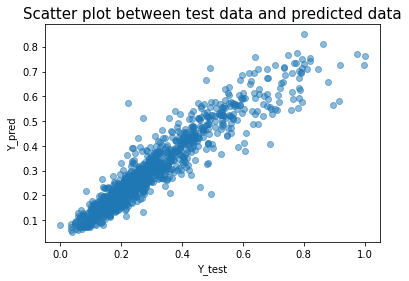

In [91]:
# Let's plot the graph of predicted and actual data
plt.scatter(y_test,rfr_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

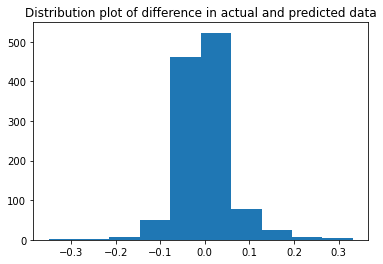

In [92]:
# Let's plot distribution plot
plt.hist(y_test - rfr_pred)
plt.title("Distribution plot of difference in actual and predicted data")
plt.show()

#### Hyper parameter tunning for GradientBooostingRegressor

In [93]:
# setting parameters dictionary
gradient_parameters={'n_estimators' : [20, 50, 70, 100, 200, 1000]
            ,'learning_rate' : [1, 0.5, 0.2, 0.1, 0.05,0.02, .01, 0.001],
            'criterion':['mse','mae'],
           'max_depth':range(5,16,2),
           'max_features': ['auto','sqrt'],
            'min_samples_split':range(200,1001,200)
           }

In [94]:
# Using RandomzedSearchCV for hypertunning GradientBoostingRegression
gbr_cv = RandomizedSearchCV(grd_reg, param_distributions=gradient_parameters,
                      scoring='r2', n_jobs=-1, verbose=2, cv=5)

gbr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:  2.0min remaining:   50.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.5min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [1, 0.5, 0.2, 0.1,
                                                          0.05, 0.02, 0.01,
                                                          0.001],
                                        'max_depth': range(5, 16, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': range(200, 1001, 200),
                                        'n_estimators': [20, 50, 70, 100, 200,
                                                         1000]},
                   scoring='r2', verbose=2)

In [95]:
# finding best parameters and best score
print(gbr_cv.best_params_)
print(gbr_cv.best_score_)

{'n_estimators': 1000, 'min_samples_split': 600, 'max_features': 'auto', 'max_depth': 7, 'learning_rate': 0.5, 'criterion': 'mse'}
0.8752876584604496


In [96]:
# Let's now try best parameter on GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators= 100, min_samples_split=1000, learning_rate=0.5,
                            max_features= 'sqrt', max_depth= 11, criterion= 'mse')
gbr.fit(x_train,y_train)
print("Training score = %.2f"%gbr.score(x_train,y_train))
gbr_pred = gbr.predict(x_test)
print("Coef. of determination = %.2f "%r2_score(y_test,gbr_pred))
print("\nMean Absolute error = %.3f"%mean_absolute_error(y_test,gbr_pred))
print("Means Squared error = %.3f"%mean_squared_error(y_test,gbr_pred))
cv=cross_val_score(gbr, X,y, cv=5 ,scoring='r2')
print("\nCross vald. score = %.2f"%cv.mean())
print("Standard deviation = %.2f"%cv.std())

Training score = 0.93
Coef. of determination = 0.89 

Mean Absolute error = 0.039
Means Squared error = 0.003

Cross vald. score = 0.84
Standard deviation = 0.03


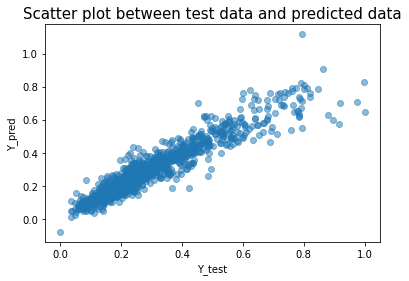

In [97]:
# Let's plot the graph of predicted and actual data
plt.scatter(y_test,gbr_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

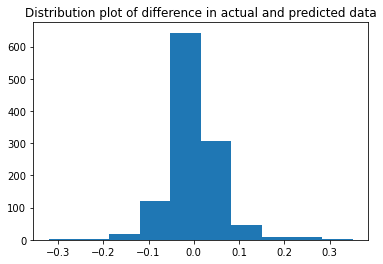

In [98]:
# Distribution plot
plt.hist(y_test - gbr_pred)
plt.title("Distribution plot of difference in actual and predicted data")
plt.show()

###### After testing various algorithms and hypertunnig the best two algorithms we find that both RandomForestRegressor and GradientBoostingRegressor are giving better results but we are finalising the GradientBoostingRegressor algorithm for our model as there is minimum difference in coefficient of determination and cross validation score and also less variance in result in the higher SalePrice.
###### The selected model gives coefficient of determination value =0.89 with minimum mean absolute error of 0.039 and cross validation score 0.84 with a least standard deviation of 0.03.

## Finalising & Saving  the model

In [99]:
# saving the model
import joblib
joblib.dump(gbr,'Carprice_prediction.obj')  # model and filename

['Carprice_prediction.obj']

In [100]:
# Loading the model
gbr_model = joblib.load('Carprice_prediction.obj')
gbr_model

GradientBoostingRegressor(criterion='mse', learning_rate=0.5, max_depth=11,
                          max_features='sqrt', min_samples_split=1000)

In [101]:
# Predicting the values 
gbr_predictions=gbr_model.predict(X)
print('Predictions of Random Forest Regressor: ',gbr_predictions)

Predictions of Random Forest Regressor:  [0.3479031  0.41334629 0.44043935 ... 0.4482613  0.59320814 0.45234612]


In [102]:
#Comparing actual and predicted values
predictions=pd.DataFrame({'Original_price':y, 'Predicted_price':gbr_predictions})
predictions

,Original_price,Predicted_price
0,0.298101,0.347903
1,0.423953,0.413346
2,0.429566,0.440439
3,0.235877,0.263694
4,0.399165,0.444089
...,...,...
4784,0.377402,0.342697
4785,0.261387,0.303283
4786,0.402479,0.448261
4787,0.512731,0.593208


## Conclusion

After working on this project ,we got a lot of insights of how to collect data , preprocess it ,remove unwanted data  and how to tackle null values to create a good model.
In this project  we find various factors responsible for the sale price of a car. Let’s take each variable  to describe our observations from this project –
* i.	Brand Name – 
After analysing the brand name variable we find that in Indian car market brands like “Maruti , Hyundai, Honda , Toyota” are covering most of the market while moving towards the Saleprice value we find that the premium brands like “Jaguar, LandRover , Mitsubishi, Mercedes , jeep , Audi , BMW” are among the most valued brands in Re-sale Car market.
* ii.	Make_yr Variable –
Analysing the Make_yr variable we find that the cars who have been manufactured in 2012-2018 are more in number for sale while athe average graph of SalePrice denotes that there is constant rise in SalePrice each year upto 2020, in 2020 due to covid crisis it comes down but after that again start to rise.
* Model Variable –
“Rover , A3 , A6 ,Q3 ,Tuscon, Pajero , Benz’ are among the top model whose average sale price is high.
* iii.	Owner Variable – 
Owner variable shows the number of owners while selling the car. So most of the data contains least owners which is 1 and a few data was present of more than 2 owners. While checking the effect of Owners on SalePrice we find that more the owners less will be the sale price.
* iv.	Kms_driven Variable – 
In this variable we have a right skewness as some of the cars had travelled a lot while some very less. As some people travels more through public transport while some use their own vehicle to travel this cause variance in data. There is very high difference in minimum and maximum kilometers driven in datatset.
* v.	Fuel_type Variable – 
Nowdays there are more than 2 types of fuel used in cars they may be petrol , diesel, electric or hybrid but the data we collected contains only petrol and diesel and based on this we do analysis and found out that people owning petrol cars are more in number but diesel cars are more costilier than petrol cars.
* vi.	Transmission Variable – 
In transmission we have 3 options – Manual, Automatic, Hybrid.But the data we collected contains only Manual and Automatic type of transmission. As Automatic transmission is newly introduced in Indian Market a few years back so there is not much data based on this type of transmission. While finding the saleprice we noticed that Automatic transmission has higher Average SalePrice as compared to Manual.
* vii.	RTO Variable – 
RTO variable define the  State in which Road tax Office is present. And we find that Delhi , UttarPardesh are among the States with minimum Avg SalePrice while AndraPradesh and WestBengal are having maximum Avg. salePrice.
* viii.	Insurance Variable –
Insurance variable contains a lot of dirty data. First we cleaned it using the replace method and then it also have a lot of null values which were treated using the most frequent value.
After this we tried to find that most of the cars having Third Party insurance and the cars with Zero Depriciation are among the most valued during the sale as in Zero depreication , all liabilities are covered by insurance company.
